In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

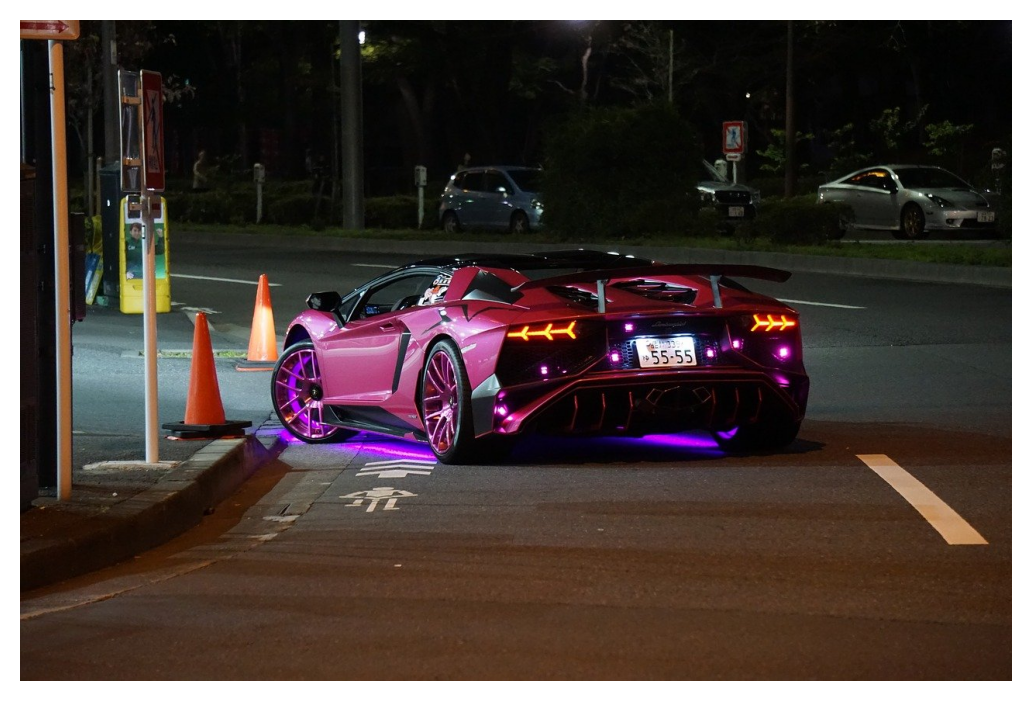

In [25]:
#С помощью библиотеки OpenCV считайте изображение:
img = cv2.imread('/home/tuandinh/Desktop/Image-Processing-in-ITMO/Week 6/images_assigment/tokyo-4132144_1280.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
img.shape

(853, 1280, 3)

True

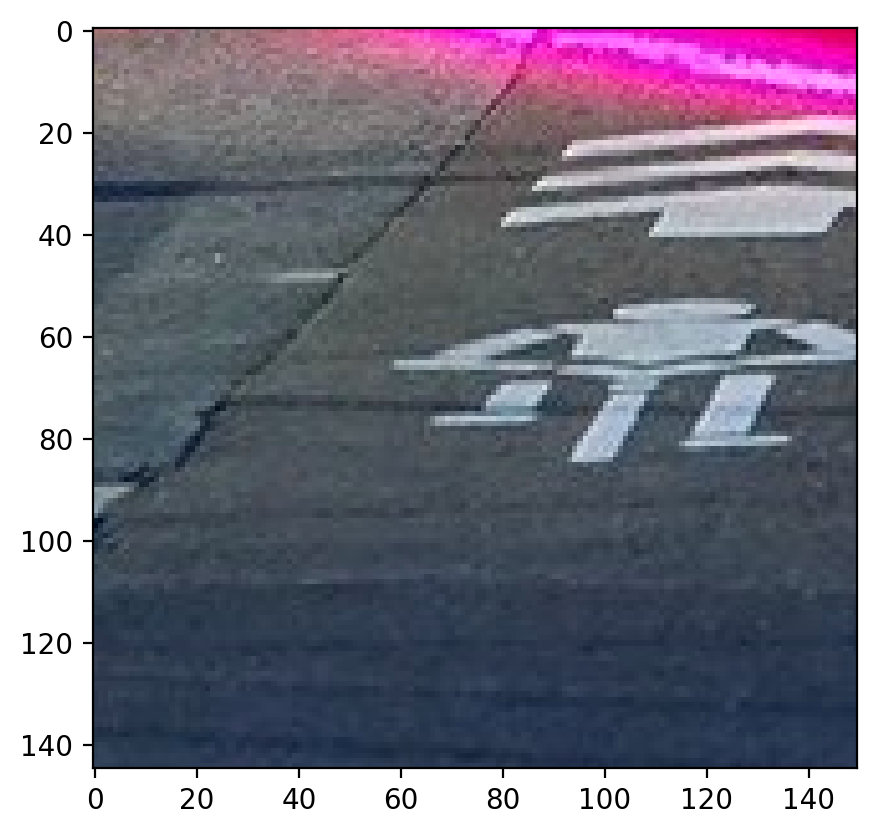

In [27]:
# Cropping an image
cropped_image = img[550:695, 353:503]
plt.imshow(cropped_image)
# Save the cropped image
cv2.imwrite("/home/tuandinh/Desktop/Image-Processing-in-ITMO/Week 6/images_assigment/Cropped Image.jpg", cropped_image)

In [28]:
# import required module
from PIL import Image
  
# get image
filepath = "/home/tuandinh/Desktop/Image-Processing-in-ITMO/Week 6/images_assigment/Cropped Image.jpg"
cropped_image = Image.open(filepath)
  
# get width and height
width = cropped_image.width
height = cropped_image.height
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)


The height of the image is:  145
The width of the image is:  150


In [32]:
cropped_image = img[550:695, 353:503]

In [33]:
#  Используйте дескриптор SIFT для нахождения одного изображения в другом (кадрированного на исх/span>
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(cropped_image, None)
for i in range(0,3):
  print("SIFT Keypoint:",i)
  print("Координаты ",kp[i].pt,"Размер ", kp[i].size, "Угол ", kp[i].angle)


SIFT Keypoint: 0
Координаты  (9.236286163330078, 87.93403625488281) Размер  3.447970151901245 Угол  137.136474609375
SIFT Keypoint: 1
Координаты  (9.236286163330078, 87.93403625488281) Размер  3.447970151901245 Угол  249.69305419921875
SIFT Keypoint: 2
Координаты  (14.38392162322998, 31.559284210205078) Размер  2.446704626083374 Угол  80.24942016601562


In [34]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None) 
kp2, des2 = sift.detectAndCompute(cropped_image, None) 

In [35]:
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
#crossCheck=false - совпадения вида один ко многим, crossCheck=true - совпадения вида один к одному
matches = bf.match(des1,des2)

+ Các trận đấu kết quả có các thuộc tính khoảng cách (trên thực tế, khoảng cách giữa hai vectơ, trong trường hợp của chúng tôi là Euclidean), chỉ số tương ứng với hình ảnh đầu tiên, chỉ số tương ứng với hình ảnh thứ hai.

+ Sắp xếp các kết quả phù hợp từ tốt nhất đến kém nhất tùy thuộc vào thuộc tính khoảng cách (càng nhỏ càng tốt).

In [36]:
matches = sorted(matches, key = lambda x:x.distance) 
print('Количество совпадений ', len(matches))
for i in range(0,3): #выведем первые 3 
  print('Расстояние ',matches[i].distance,'Индекс 1 ',matches[i].trainIdx,'Индекс 2 ', matches[i].queryIdx)

Количество совпадений  80
Расстояние  0.0 Индекс 1  2 Индекс 2  815
Расстояние  0.0 Индекс 1  3 Индекс 2  816
Расстояние  0.0 Индекс 1  4 Индекс 2  837


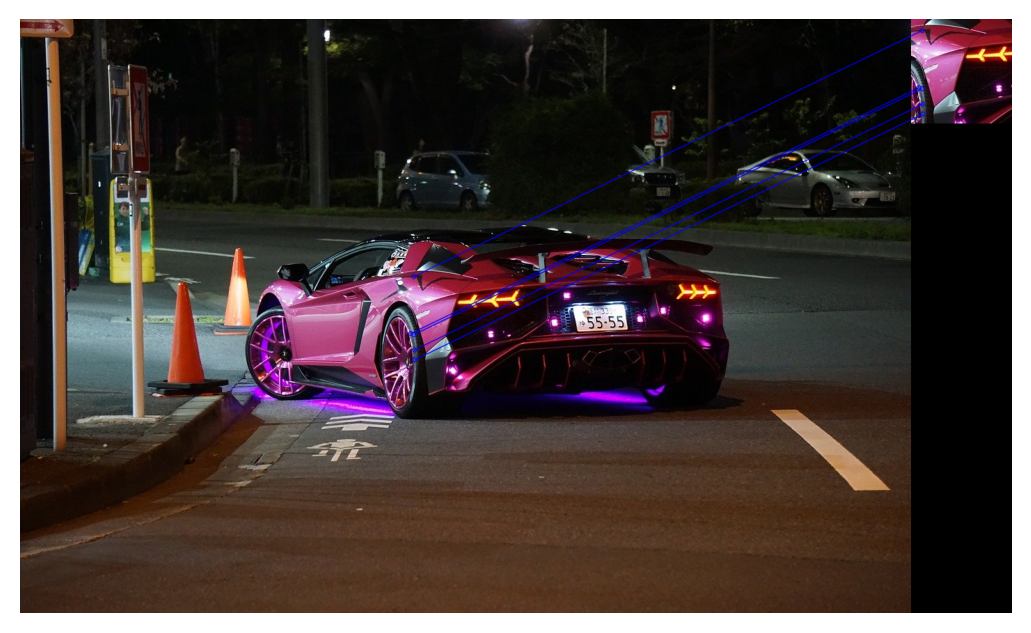

In [ ]:
matching_result = cv2.drawMatches(img, kp1, cropped_image, kp2, matches[:5], None, [255,0,0], flags=2)
mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))